## Nilearn simple NN
A simple neural net that trains itself on a single fMRI, and predicts... something.

In [2]:
## Nilearn tests
# Following http://nilearn.github.io/auto_examples/plot_decoding_tutorial.html#sphx-glr-auto-examples-plot-decoding-tutorial-py
%matplotlib inline
import nilearn
from nilearn import datasets, plotting
from nilearn.input_data import NiftiMasker
import numpy as np
import nibabel

## Get the data, and show a demo visualization

In [8]:
haxby_dataset = datasets.fetch_haxby(subjects=list(range(1, 7)))

fmri = nilearn.image.load_img(haxby_dataset.func[1])
dataobj = fmri.get_data()

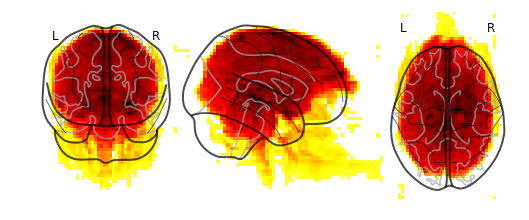

In [12]:
# Get image at a particular time, formatted for the CNN
def getImage(data, i):
    return data[:,:,:,i].reshape(1,40,64,64)

# Display an image/tensor that is stored as the input to the CNN
def displayImage(image, affine=fmri.affine):
    nilearn.plotting.plot_glass_brain(nibabel.Nifti1Image(image.reshape(40,64,64), affine))

# Make a stupid list of 2 tensors and dummy data.
images = np.array([getImage(dataobj, 0), getImage(dataobj, 1)])

displayImage(images[0])

X_train = images
Y_train = [[1,0], [0,1]]
X_test = X_train
Y_test = Y_train


input_shape = (1, 40, 64, 64)
output_shape = (2) # Kinda silly - not actually used by the NN

# Setup the Deep NN

In [18]:
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Convolution3D, MaxPooling3D
from keras.utils import np_utils
K.set_image_dim_ordering('th')



In [34]:
model = Sequential()

# Convolution2D(number_filters, row_size, column_size, input_shape=(number_channels, img_row, img_col))

model.add(Convolution3D(6, 2, 5, 5, input_shape=input_shape, border_mode='same', name='conv2d_1'))
model.add(Activation('relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), name='maxpool_1'))
model.add(Convolution3D(16, 2, 5, 5, border_mode='same', name='conv2d_2'))
model.add(Activation('relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), name='maxpool_2'))
model.add(Convolution3D(120, 2, 5, 5, name='conv2d_3'))
model.add(Activation('relu'))
#model.add(Dropout(0.25, name='dropout_2'))
shape = model.layers[-1].output_shape
model.add(Reshape((shape[1]*shape[2]*shape[3]*shape[4],)))
model.add(Dense(2, name='dense_squirrel'))

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta')
nb_epoch = 2  # try increasing this number
batch_size = 2
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          show_accuracy=True, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)

/Users/ezradavis/anaconda3/lib/python3.5/site-packages/keras/models.py:603: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Train on 2 samples, validate on 2 samples
Epoch 1/2
2/2 [==============================] - 0s - loss: 8.0590 - val_loss: 8.0590
Epoch 2/2
2/2 [==============================] - 0s - loss: 8.0590 - val_loss: 8.0590


/Users/ezradavis/anaconda3/lib/python3.5/site-packages/keras/models.py:644: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '
